In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from vega import VegaLite
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
sns.set_style("whitegrid")

# On s'intéresse  aux navires qui partent de France vers l'étranger en 1789
## 1. Tous les navires en 1789
On exclut les bateaux au départ de "Provence", "Roussillon", "Languedoc", "Isles de Corse", "Canada", "Guyane" et à destination de "zone maritime"

In [3]:
#sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [4]:
sorties = pd.read_csv("sorties_navires_vers_etranger_mixte_DFLR_ailleurs_tout1787.csv")

In [5]:
sorties = sorties[sorties.state_destination != "zone maritime"]
exclude = ["Provence", "Roussillon", "Languedoc", "Isles de Corse", "Canada", "Guyane"]
sorties = sorties[~sorties.region_depart.isin(exclude)]

In [6]:
sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")

In [7]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [8]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

In [9]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

In [10]:
sorties["destination"] = sorties["substate_destination"].fillna(sorties["state_destination"])

In [11]:
sorties["outside_DFLR_region_depart"] = sorties.region_depart != "Aunis-Saintonge-Poitou"
sorties["Région de départ"] = sorties["outside_DFLR_region_depart"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})

In [12]:
tonnage_total = sorties["tonnage"].sum()

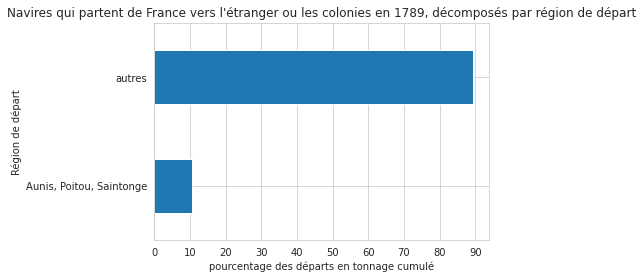

In [13]:
((sorties.groupby("Région de départ")["tonnage"].sum())*100/tonnage_total).plot.barh()
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('pourcentage des départs en tonnage cumulé')
plt.title("Navires qui partent de France vers l'étranger ou les colonies en 1789, décomposés par région de départ")
plt.show()

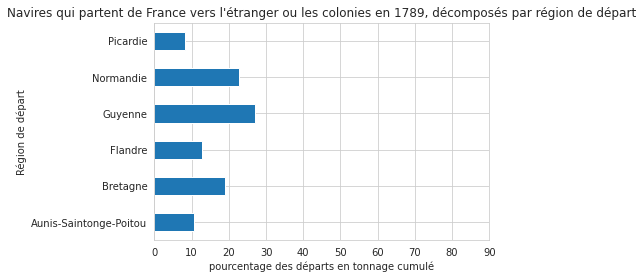

In [14]:
((sorties.groupby("region_depart")["tonnage"].sum())*100/tonnage_total).plot.barh()
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('pourcentage des départs en tonnage cumulé')
plt.ylabel('Région de départ')
plt.title("Navires qui partent de France vers l'étranger ou les colonies en 1789, décomposés par région de départ")
plt.show()

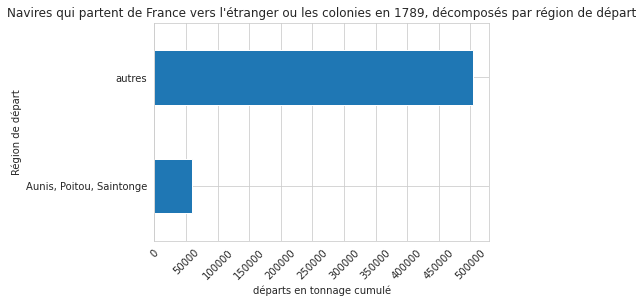

In [15]:
(sorties.groupby("Région de départ")["tonnage"].sum()).plot.barh()
plt.xticks([x*10000 for x in range(0,55,5)], rotation=45)
plt.xlabel('départs en tonnage cumulé')
plt.title("Navires qui partent de France vers l'étranger ou les colonies en 1789, décomposés par région de départ")
plt.show()

## 2. Les navires qui partent d'Aunis, Poitou, Saitonge vers l'étranger en 1789
Même quand on ne s'intéresse qu'aux départs de la région d'intérêt, quand on regarde les ports d'attache on voit que ce sont principalement des bateaux étrangers à la région

In [16]:
sorties = sorties[sorties.region_depart == "Aunis-Saintonge-Poitou"]
tonnage_total = sorties["tonnage"].sum()

In [17]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

In [18]:
sorties["Port d'attache"] = sorties["outside_DFLR"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})

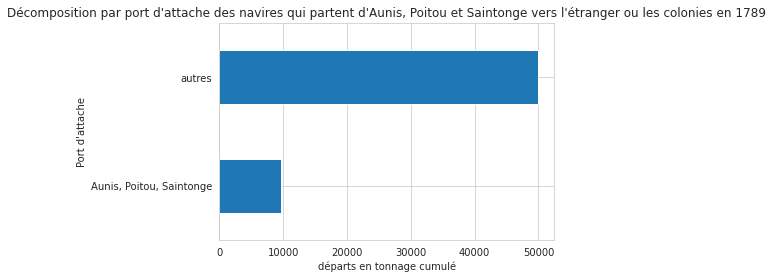

In [19]:
(sorties.groupby("Port d'attache")["tonnage"].sum()).plot.barh()
plt.title("Décomposition par port d'attache des navires qui partent d'Aunis, Poitou et Saintonge vers l'étranger ou les colonies en 1789")
plt.xlabel('départs en tonnage cumulé')
plt.show()

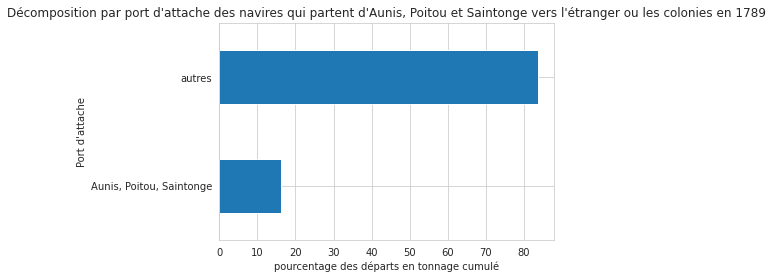

In [20]:
((sorties.groupby("Port d'attache")["tonnage"].sum())*100/tonnage_total).plot.barh()
plt.title("Décomposition par port d'attache des navires qui partent d'Aunis, Poitou et Saintonge vers l'étranger ou les colonies en 1789")
plt.xlabel('pourcentage des départs en tonnage cumulé')
plt.show()

### 2.1. Quels sont les ports d'attaches de ces navires étrangers à la région?

In [21]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

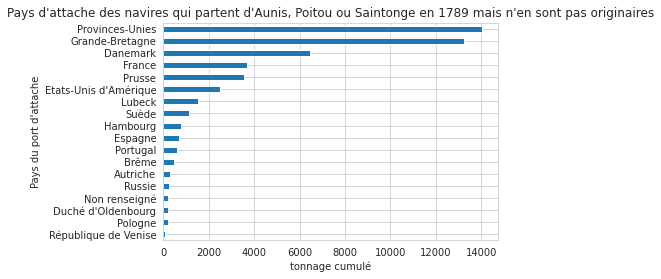

In [22]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires qui partent d'Aunis, Poitou ou Saintonge en 1789 mais n'en sont pas originaires")
plt.xlabel("tonnage cumulé")
plt.ylabel("Pays du port d'attache")
plt.show()

### 2.2. Quelles sont leurs destinations ?

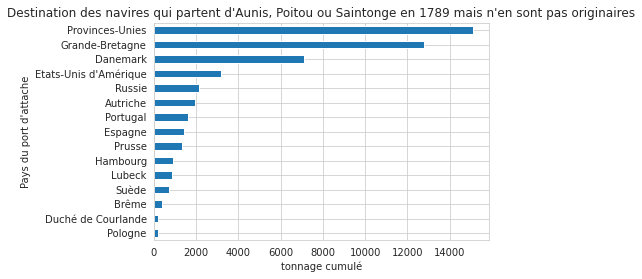

In [23]:
noDFLR.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destination des navires qui partent d'Aunis, Poitou ou Saintonge en 1789 mais n'en sont pas originaires")
plt.xlabel("tonnage cumulé")
plt.ylabel("Pays du port d'attache")
plt.show()

### 2.3 Focus sur les navires français

#### 2.3.1 Tous les navires français

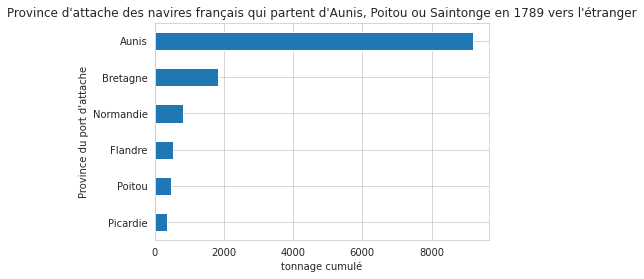

In [24]:
fr = sorties[(sorties.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title(
    "Province d'attache des navires français qui partent d'Aunis, Poitou ou Saintonge en 1789 vers l'étranger")
plt.xlabel("tonnage cumulé")
plt.ylabel("Province du port d'attache")
plt.show()

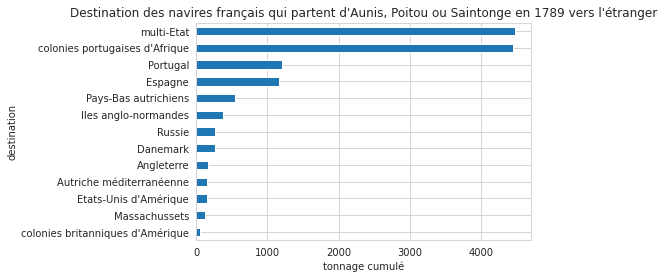

In [34]:
sorties[(sorties.homeport_state_1789_fr == "France")].groupby("destination")["tonnage"].sum().sort_values().plot.barh()
plt.title("Destination des navires français qui partent d'Aunis, Poitou ou Saintonge en 1789 vers l'étranger")
plt.xlabel("tonnage cumulé")
plt.ylabel("destination")
plt.show()
plt.show()

#### 2.3.2 Seulement les navires français qui ne sont pas armés dans la région

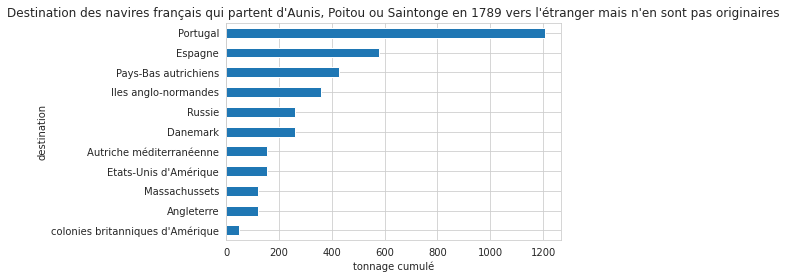

In [35]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("destination")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title(
    "Destination des navires français qui partent d'Aunis, Poitou ou Saintonge en 1789 vers l'étranger mais n'en sont pas originaires")
plt.xlabel("tonnage cumulé")
plt.ylabel("destination")
plt.show()

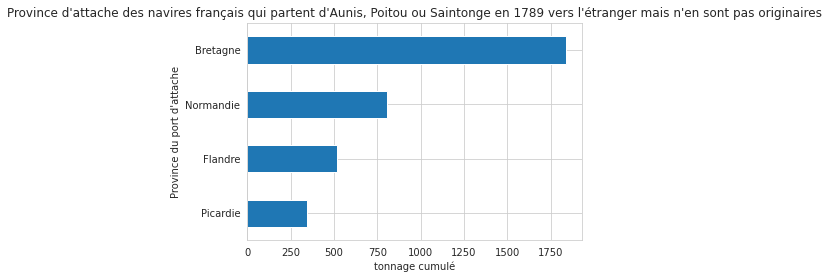

In [27]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title(
    "Province d'attache des navires français qui partent d'Aunis, Poitou ou Saintonge en 1789 vers l'étranger mais n'en sont pas originaires")
plt.xlabel("tonnage cumulé")
plt.ylabel("Province du port d'attache")
plt.show()

#### Cette domination de la Bretagne est surprenante. On suppose qu'il s'agit majoritairement de petits bateaux de pêcheurs, ce que confirme le diagramme en violons
(les lignes en pointillé sont le premier quartile, la médiane et le 3e quartile)

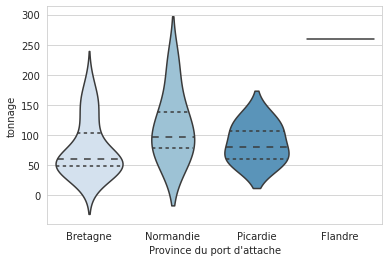

In [28]:
ax = sns.violinplot(
    x="homeport_province", 
    y="tonnage",
    inner="quartile",
    data=noDFLR[(noDFLR.homeport_state_1789_fr == "France")],
    palette="Blues"
)
plt.xlabel("Province du port d'attache")
plt.show()

### 2.4 Les navires qui sont armés dans la région

In [36]:
DFLR = sorties[(sorties.outside_DFLR == False)]

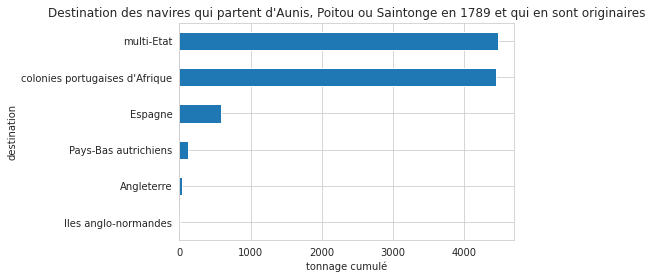

In [40]:
DFLR.groupby("destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destination des navires qui partent d'Aunis, Poitou ou Saintonge en 1789 et qui en sont originaires")
plt.xlabel("tonnage cumulé")
plt.ylabel("destination")
plt.show()

### 2.5. Focus sur les navires au départ de la région et à destination de la Grande-Bretagne

In [29]:
gb = sorties[sorties.state_destination == "Grande-Bretagne"]

In [30]:
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna(gb["homeport_province"])
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna("Grande-Bretagne, province absente")

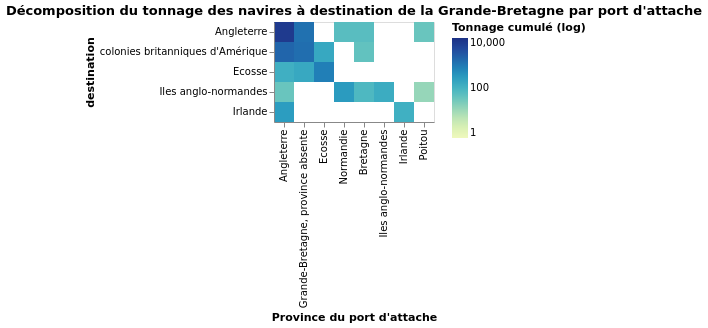

In [31]:
VegaLite({
    "title": "Décomposition du tonnage des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "y": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination",
            "sort": "-color"
        },
        "x": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "tonnage",
            "title": "Tonnage cumulé (log)",
            "scale": {
                "type": "log",
                "domain": [1,10000]
            }
        }
    }
}, gb)

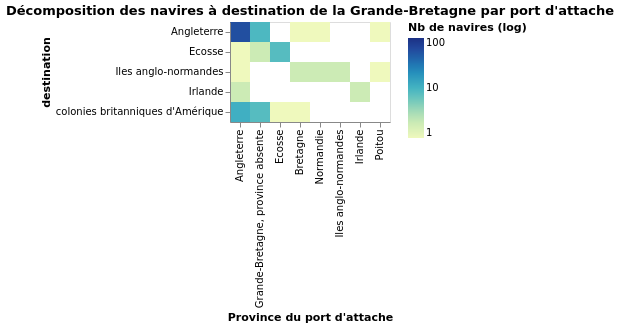

In [32]:
VegaLite({
    "title": "Décomposition des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "y": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination"
        },
        "x": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "count",
            "title": "Nb de navires (log)",
            "scale": {
                "type": "log",
                "domain": [1,100]
            }
        }
    }
}, gb)